In [6]:
#Import Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold#Import Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report

In [5]:
pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2935 sha256=63ae66b98624c055090c05daec5f7920d0c922f326589dd9bd10d5e729cf82af
  Stored in directory: /home/syed/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Reading the dataset

import pandas as pd
import numpy as np

# create header for dataset
header = ['age','bp','sg','al','su','rbc','pc','pcc',
    'ba','bgr','bu','sc','sod','pot','hemo','pcv',
    'wbcc','rbcc','htn','dm','cad','appet','pe','ane',
    'classification']
# read the dataset
df = pd.read_csv("/content/drive/MyDrive/ckd/chronic_kidney_disease.arff",
        header=None,
        names=header
       )

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ckd/chronic_kidney_disease.arff'

In [ ]:
df.shape

(400, 25)

In [ ]:
# remove '\t' from all columns
for col in df.columns:
    df[col] = df[col].str.replace('\t', '')

In [ ]:
# strip blank spaces from all cells using applymap and strip methods
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
# dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)

In [ ]:
# total NaN values in column 'B'
print(df.isnull().sum().sum())

1012


In [ ]:
for col in df:
    print(df[col].name)
    print(df[col].unique())

age
['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' nan '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79']
bp
['80' '50' '70' '90' nan '100' '60' '110' '140' '180' '120']
sg
['1.020' '1.010' '1.005' '1.015' nan '1.025']
al
['1' '4' '2' '3' '0' nan '5']
su
['0' '3' '4' '1' nan '2' '5']
rbc
[nan 'normal' 'abnormal']
pc
['normal' 'abnormal' nan]
pcc
['notpresent' 'present' nan]
ba
['notpresent' 'present' nan]
bgr
['121' nan '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263' '173' '95' '108' '156' '264' '123' '93'
 '107' '159' '140' '171' '270' '92' '137' '204' '79' '207' '124' '144'
 '91' '162' '246' '253' '141' '182' '86' '150' '146' '425' '112' '250'
 '360' '163' '

In [ ]:
for col in df:
    print(df[col].name)
    print(df[col].isnull().sum())

age
9
bp
12
sg
47
al
46
su
49
rbc
152
pc
65
pcc
4
ba
4
bgr
44
bu
19
sc
17
sod
87
pot
88
hemo
52
pcv
71
wbcc
106
rbcc
131
htn
2
dm
2
cad
2
appet
1
pe
1
ane
1
classification
0


In [ ]:
#Categorical to numerical:
df =df.replace({'yes':1 ,'no':0,'present':1 , 'notpresent':0, 'normal':1,'abnormal':0,"good":1,"poor":0, 'ckd': 1 , 'notckd': 0})

In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,NaN,1.0,0.0,0.0,121,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7,50,1.020,4,0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62,80,1.010,2,3,1.0,1.0,0.0,0.0,423,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48,70,1.005,4,0,1.0,0.0,1.0,0.0,117,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51,80,1.010,2,0,1.0,1.0,0.0,0.0,106,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,1.0,1.0,0.0,0.0,140,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42,70,1.025,0,0,1.0,1.0,0.0,0.0,75,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12,80,1.020,0,0,1.0,1.0,0.0,0.0,100,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17,60,1.025,0,0,1.0,1.0,0.0,0.0,114,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
df['classification'].unique()

array([1, 0])

In [ ]:
# count the number of samples in each class
class_counts = df['classification'].value_counts()

# calculate the proportion of each class
class_proportions = class_counts / len(df)

# display the class proportions
print(class_proportions)

1    0.625
0    0.375
Name: classification, dtype: float64


In [ ]:
#Dealing with abnormally values:
df=df.replace({'\t':np.nan , '\t43':43,'\t6200':6200 , '\t8400':8400, '\t?':np.nan,'ckd\t':"ckd","\tyes":"yes","\tno":"no"," yes":"yes"})

In [ ]:
# Deal with missing value:
imputer=IterativeImputer(estimator=RandomForestRegressor(n_estimators= 100))
df=imputer.fit_transform(df)
# feature_names_in_=["rbc",'pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']
df =pd.DataFrame(df,columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'])

[IterativeImputer] Early stopping criterion not reached.


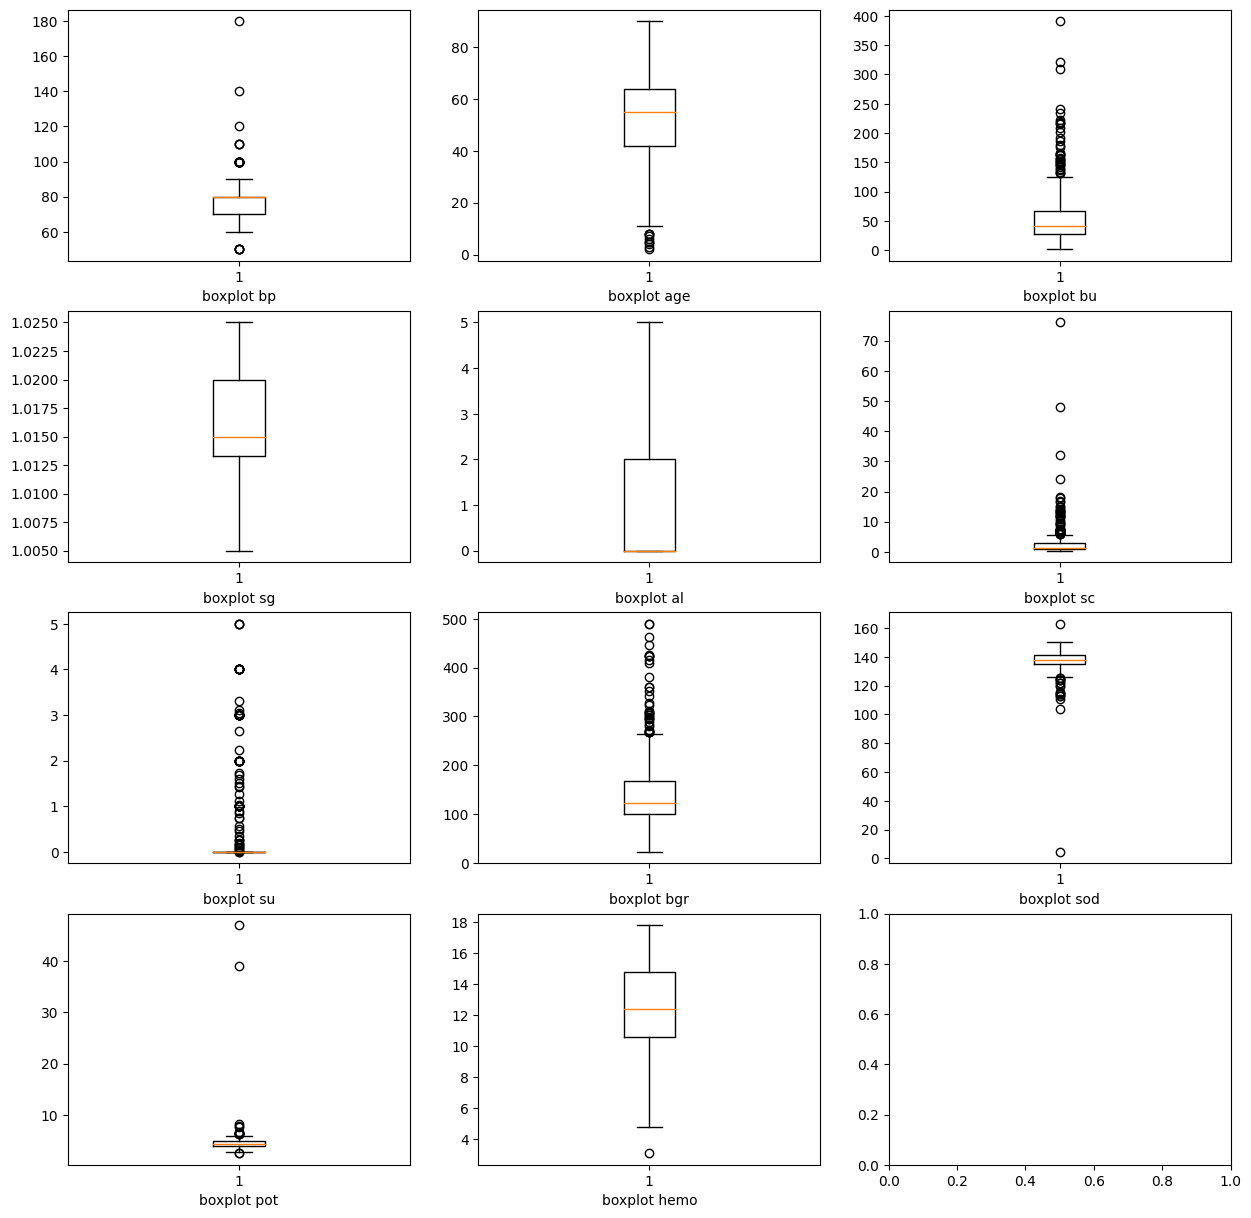

In [ ]:
figure, axe = plt.subplots(4,3,figsize=(15,15))
axe[0,0].boxplot(df['bp'])
axe[0,0].set_xlabel("boxplot bp")
axe[0,1].boxplot(df['age'])
axe[0,1].set_xlabel("boxplot age")
axe[0,2].boxplot(df['bu'])
axe[0,2].set_xlabel("boxplot bu")

axe[1,0].boxplot(df["sg"])
axe[1,0].set_xlabel("boxplot sg")
axe[1,1].boxplot(df["al"])
axe[1,1].set_xlabel("boxplot al")
axe[1,2].boxplot(df["sc"])
axe[1,2].set_xlabel("boxplot sc")
axe[2,0].boxplot(df["su"])
axe[2,0].set_xlabel("boxplot su")
axe[2,1].boxplot(df["bgr"])
axe[2,1].set_xlabel("boxplot bgr")
axe[2,2].boxplot(df["sod"])
axe[2,2].set_xlabel("boxplot sod")

axe[3,0].boxplot(df["pot"])
axe[3,0].set_xlabel("boxplot pot")
axe[3,1].boxplot(df["hemo"])
axe[3,1].set_xlabel("boxplot hemo")

plt.show()


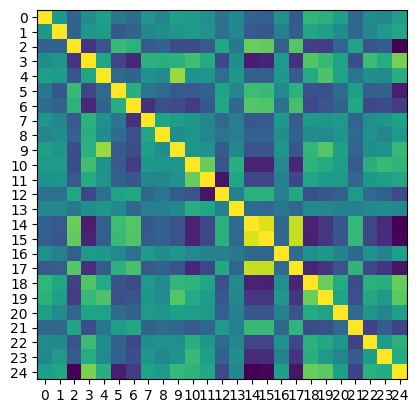

In [ ]:
# corplot=plt.imshow(dataset.corr())
fig, ax = plt.subplots()
im = ax.imshow(df.corr())

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
plt.show()
# , labels=dataset.columns
# np.arange(len(dataset.columns))

In [ ]:
X = df.loc[:, df.columns != 'classification']
y = df['classification']

In [ ]:
min_max = MinMaxScaler()
min_max.fit(X)
X = min_max.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
log = LogisticRegression()
cv_v = cross_val_score(log, X_train, y_train, cv=4)
print(cv_v)
print(cv_v.std())
print(cv_v.mean())

[0.9875 0.975  1.     1.    ]
0.01036445246986063
0.990625


In [ ]:
log.fit(X_train,y_train)


LogisticRegression()

In [ ]:
y_pred = log.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
import shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


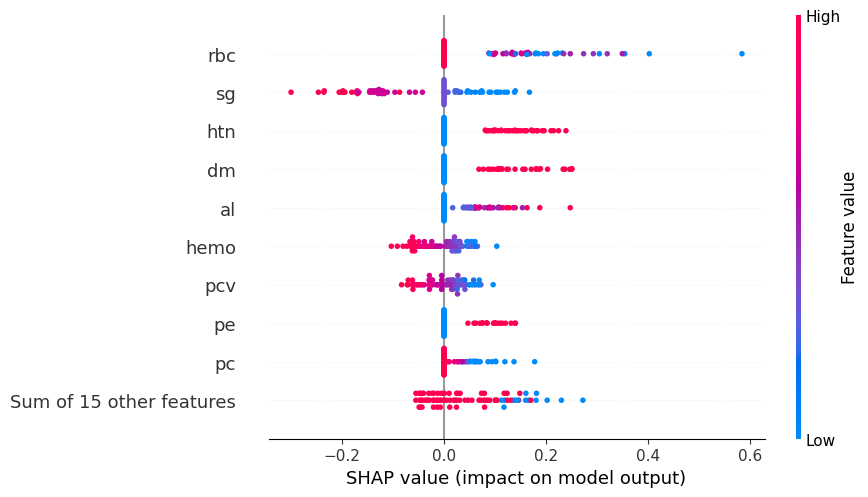

In [ ]:
shap.plots.beeswarm(shap_values)


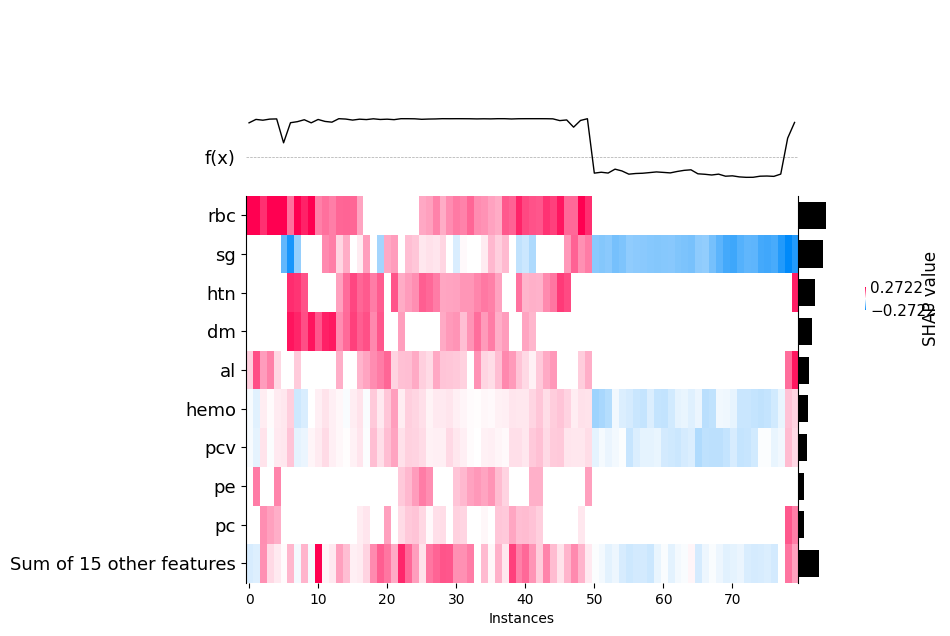

In [ ]:
shap.plots.heatmap(shap_values)


In [ ]:
# Convert X_test to pandas dataframe
X_train_df = pd.DataFrame(X_train, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'])

In [ ]:
# Convert X_test to pandas dataframe
X_test_df = pd.DataFrame(X_test, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'])

In [ ]:
f = lambda x: log.predict_proba(x)[:,1]
med = X_train_df.median().values.reshape((1,X_train_df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test_df.iloc[0:1000,:])

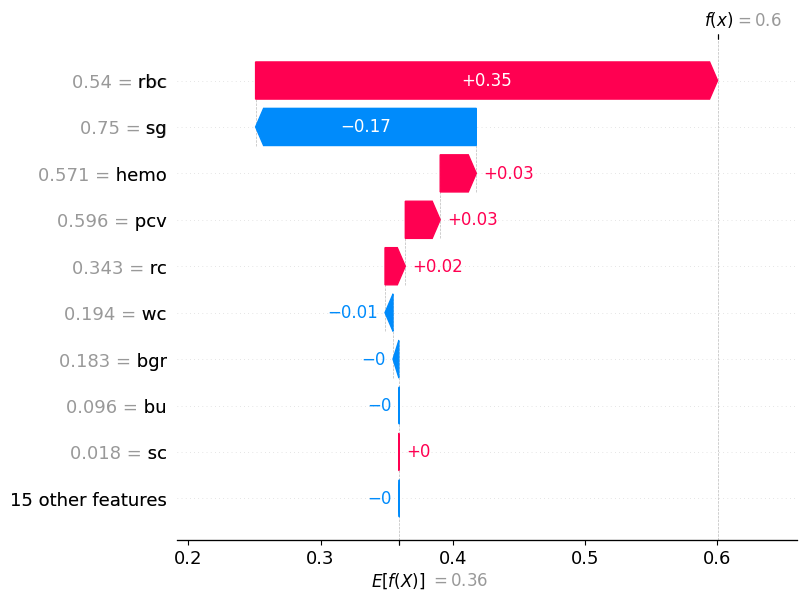

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
# Initialize explainer
explainer = shap.KernelExplainer(log.predict_proba, X_train)

# Compute Shapley values for first instance in X_test
shap_values = explainer.shap_values(X_test_df.iloc[0,:])

# Generate force plot for first instance in X_test
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_df.iloc[0,:])

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

  0%|          | 0/80 [00:00<?, ?it/s]